<center><img src="img/AZG_Bank_intro.png"/></center>
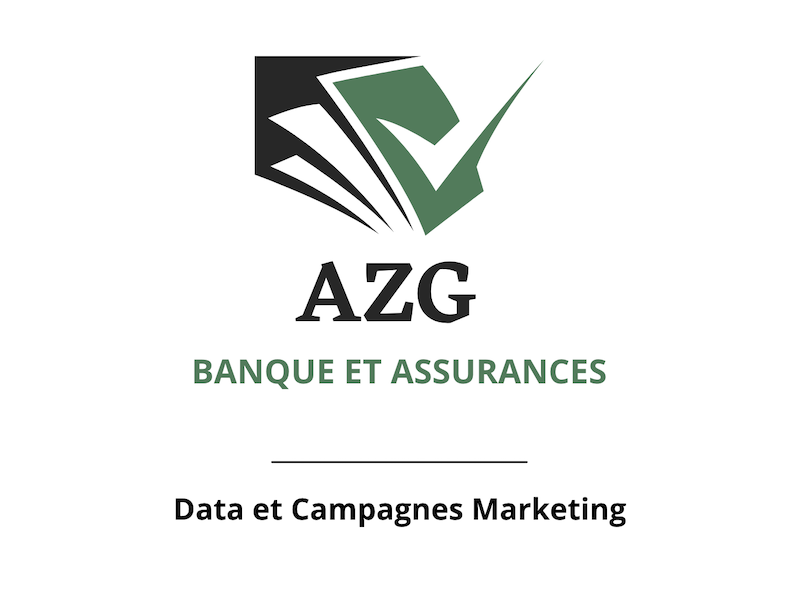

Dans ce projet, nous allons aborder le Data Marketing pour AZG Banque et Assurances (entreprise fictive). L'enjeu est de prédire si un nouveau client sera sensible ou pas à une offre bancaire à partir des données de son **CRM (Customer Relationship Management)** dans le cadre d'une campagne de télémarketing.  Ce type de campagne est une démarche qui peut être ressentie comme intrusif. Il est donc judicieux de bien **segmenter les clients cibles** pour à la fois ne pas renvoyer une image d'omniprésence, augmenter le lifetime customer et établir de bonnes relations.

## Sommaire

- [Introduction](#Introduction)
    - [Contexte métier](#Contexte-métier)
    - [Méthodologie](#Méthodologie)
- [Importation des librairies](#Importation-des-librairies)
- [Importation et nettoyage des données](#Importation-et-nettoyage-des-données)
    - [Importation des données](#Importation-des-données)
    - [Dictionnaire des données](#Dictionnaire-des-données)
    - [Aperçu et nettoyage des données](#Aperçu-et-nettoyage-des-données)
- [Analyse descriptive des données](#Analyse-descriptive-des-données)
    - [Vue globale de la campagne](#Vue-globale-de-la-campagne)
    - [Caractéristiques des clients](#Caractéristiques-des-clients)
        - [Distribution des âges](#Distribution-des-âges)
        - [Distribution des soldes](#Distribution-des-soldes)
- [Analyses Bivariées](#Analyses-Bivariées)
    - [Matrice de corrélation](#Matrice-de-corrélation)
    - [Par caractéristiques clients](#Par-caractéristiques-clients)
    - [Caractéristiques bancaires](#Caractéristiques-bancaires)
    - [Paramètres de la campagne](#Paramètres-de-la-campagne)
    - [Données temporelles](#Données-temporelles)
- [Recommandations](#Recommandations)
- [Modèle de prédiction](#Modèle-de-prédiction)
    - [Prétraitement](#Pré-traitement)
        - [Encodage des variables catégoriques](#Encodage-des-variables-catégoriques)
        - [Centrage et réduction](#Centrage-et-réduction)
    - [Echantillonage](#Echantillonage)
    - [Comparatif des modèles](#Comparatif-des-modèles)
        - [Les modèles testés](#Les-modèles-testés)
        - [Evaluations des modèles](#Evaluations-des-modèles)
    - [Modélisation](#Modélisation)
- [Programme de prédiction](#Programme-de-prédiction)
- [Conclusion](#Conclusion)

## Introduction

### Contexte métier

La banque AZG souhaite augmenter les souscriptions aux dépôts à terme (DAT) par le lancement d'une nouvelle campagne marketing. Elle propose ces dépôts avec un taux fixe dans lequel l'argent du client lui sera restitué à une échéance spécifique.

Les campagnes de marketing sont efficaces lorsque les besoins des clients et leur satisfaction globale sont définis. La bonne stratégie pour les entreprises est d'utiliser le marketing direct lorsqu'elles ciblent des segments de clients en les contactant pour atteindre un objectif marketing.  
Plusieurs paramètres définissent une campagne marketing et sont définis dans le **marketing mix**. Elles peuvent être ajustées pour optimiser la campagne et sont les outils que l'on dispose pour atteindre les objectifs marketing *(Kotler & Dubois)*.

<center><img src="img/marketing_mix.png"/></center>

Au vu des données disponibles dans le jeu de données (que l'on verra plus loin), nous étudierons 2 grands axes du marketing mix : la segmentation client et le canal de distribution.

L'analyse des données permettra de créer des motifs de contact soumis aux commerciaux dans le réseau d'agences ou au call center afin d'aider leurs prospections et cibler leurs demandes. Cette démarche permettra d'avoir un **taux de réussite plus élevé** et donc de meilleure performance.

> Aujourd'hui, les entreprises qui embauchent des **Data analysts** s'intéressent au portefeuille des clients et à leurs données. L'analyse des données peut être une contribution à l'optimisation des campagnes marketing et l'amélioration des ROI. Une bonne connaissance de la segmentation client, ayant souscrit au dépôt à terme, permet d'identifier le profil d'un client, qui est plus susceptible d'acquérir le produit et de développer des campagnes marketing plus ciblées.

<center><img src="img/tony_may3.gif"/></center>

### Méthodologie

A partir des données, nous analyserons la campagne précédente dans laquelle les commerciaux ont exécuté des appels téléphoniques à partir d'une liste de clients pour leur demander de souscrire à un DAT. Le résultat est un contact binaire échec ou réussite et ont été reportés dans le système de données CRM.

L'objectif à partir de ces données est de construire un modèle basé sur les données qui apprend une fonction sous-jacente inconnue qui mappe plusieurs variables d'entrée et qui va caractériser une cible de sortie étiquetée (type de vente de dépôt bancaire : "échec" ou "succès"). Ce modèle sera implémenté dans un **programme de prédiction** qui sera exécuté sur une liste de clients. L'entreprise aura ainsi une liste de clients ciblés avec leurs probabilités d'acceptation respectives.

> Les données que nous analysons proviennent d'une étude sur le Marketing Data-Driven :  
**Source:**  [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Sxystems, Elsevier, 62:22-31, June 2014.

<div class="alert alert-info"><strong>REMARQUE :</strong><br> On analyse ici l'efficacité de la campagne de télémarketing. Il sera judicieux d'avoir les paramètres de la campagne pour déterminer sur quels critères on peut améliorer son efficacité. On pourrait savoir s'il s'agit d'un nouveau produit, d'une action promotionnelle, d'une assurance, le taux proposé ...
</div>

[Retour au sommaire](#Sommaire)

## Importation des librairies

Nous utiliserons pandas et numpy pour le traitement des données. Concernant notre modélisation, nous allons utiliser la librairie **sklearn** ??????

In [1]:
import os, sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate, StratifiedKFold

from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore')

# Pandas settings
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 100)

# plot config
sns.set_theme(
    style = "whitegrid",
    font_scale = 1.2,
    rc = {
        "figure.figsize" : (15,10),
        "axes.titlepad": 20,
        "axes.labelweight": "bold",
        "axes.labelsize": 12,
        "axes.titleweight": "bold",
        "axes.titlesize": 18,
        "axes.titlepad": 20,
        'figure.figsize':(12,6)
    }
)
palette = "GnBu_r"
color = "#539ebb"

/Users/laurentmay/opt/anaconda3/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
%%html
<style>
    table {float:left}
</style>

## Importation et nettoyage des données

### Importation des données

In [3]:
data = pd.read_csv('data/bank.csv')
df = data.copy()

In [4]:
df.head()

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

### Dictionnaire des données

**Données bancaires :**  

| Variables | Définition | Type |
| --- | --- | --- |
| age | âge du client | numeric |
| job | catégorie du métier | categorical |
| marital | statut marital | categorical |
| education | niveau d'étude | categorical |
| default | possède un crédit par défaut | binary |
| balance | solde compte | numeric |
| housing | possède un prêt immobilier | binary |
| loan | possède un prêt | binary |

**Données campagnes :**  

| Variables | Définition | Type |
| --- | --- | --- |
| contact | type de contact | categorical |
| day | jour du mois du dernier contact | numeric |
| month | mois de l'année du dernier contact | categorical |
| duration | durée du contact en secondest | numeric |
| campaign | nombre de contacts pendant la campagne | numeric |
| pdays | nombre de jours passés entre la campagne en cours et la dernière campagne | numeric |
| previous | nombre de contact de la précédente campagne | numeric |
| poutcome | résultat de la camapgne précédente | categorical |
| deposit | souscription à un dépôt à terme | binary |

### Aperçu et nettoyage des données

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


> Il n'y a pas de valeurs nulles dans le jeu de données. Nous disposons de **11 162 entrées et 17 variables**.

In [6]:
df.describe()

age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       20.750000      1.000000  
max      854.000000     58.000000

> Les données présentent une bonne cohérence. Par exemple, il n'y a pas de valeurs d'âge en dehors d'une plage normale.

**Liste des valeurs possibles pour les variables catégoriques :**

In [7]:
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    print(col)
    print(df[col].unique())

job
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital
['married' 'single' 'divorced']
education
['secondary' 'tertiary' 'primary' 'unknown']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'other' 'failure' 'success']
deposit
['yes' 'no']


> La liste des valeurs possibles des variables catégoriques permet d'avoir un aperçu des variables de segmentation.

### Nouveaux clients

Pour la variable "pdays", -1 signifie que le client n'a pas été contacté client lors de la précédente campagne. On va définir ces clients comme nouveaux clients.

In [8]:
df['new_customer'] = df['pdays'] == -1
df['new_customer'] = df['new_customer'].map({False:0, True:1})

[Retour au sommaire](#Sommaire)

## Analyse descriptive des données

### Vue globale de la capagne

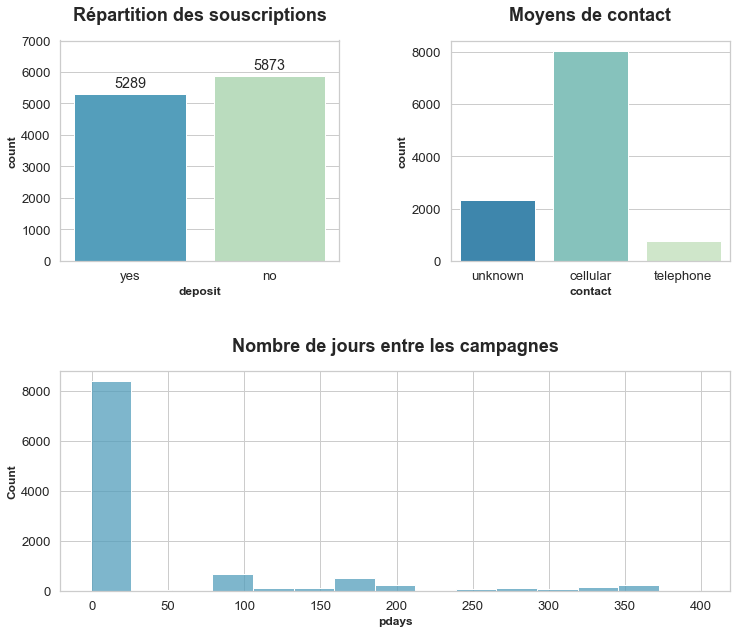

In [9]:
plt.subplot(2,2,1)
ax = sns.countplot(data=df, x='deposit', palette=palette)
ax.set_title("Répartition des souscriptions")
for container in ax.containers:
    ax.bar_label(container, padding = 4)
ax.set(ylim=(0, 7000))

plt.subplot(2,2,2)
ax = sns.countplot(data=df, x='contact', palette=palette)
ax.set_title("Moyens de contact")

plt.subplot(2,1,2)
ax = sns.histplot(data=df[df['pdays']<400], x='pdays', color=color)
ax.set_title("Nombre de jours entre les campagnes")

plt.subplots_adjust(top=1.4, hspace = 0.5, wspace = 0.4)
plt.show()

> La campagne de télémarketing a engendré **47.4%** (5289) de réponses positives.  
> Le principal moyen de contact est le **téléphone mobile**.  
> Les clients ont été contactés majoritairement en moins d'un mois entre les deux campagnes.

### Caractéristiques des clients

#### Distribution des âges

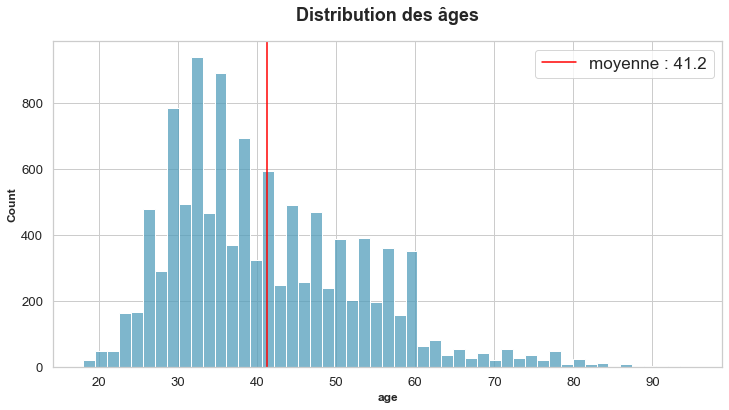

In [10]:
sns.histplot(df, x="age", color=color)
plt.axvline(x=df.age.mean(), color='red', label='moyenne : ' + str(np.round(df['age'].mean(),1)))
plt.legend(loc="upper right", fontsize=17, frameon=True)
plt.title('Distribution des âges')
plt.show()

> L'âge moyen des clients du dataset est de 41 ans.  (Minimum: 18 years old and Maximum: 95 years old.)

#### Distribution des soldes

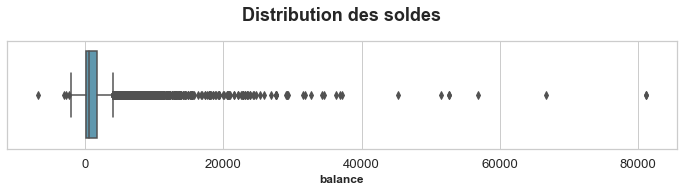

In [11]:
plt.figure(figsize=(12, 2))
sns.boxplot(x=df["balance"], color=color)
plt.title('Distribution des soldes')
plt.show()

Pour une meilleure visualisation, nous allons observer la distribution des soldes sans les outliers.

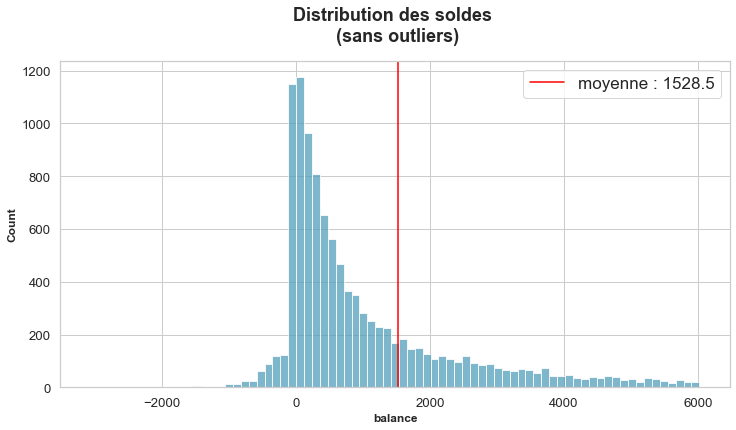

In [12]:
q_low = df["balance"].quantile(0.0)
q_hi  = df["balance"].quantile(0.95)

df_filtered = df[(df["balance"] < q_hi) & (df["balance"] > q_low)]

sns.histplot(df_filtered, x="balance", color=color)
plt.axvline(x=df.balance.mean(), color='red', label='moyenne : ' + str(np.round(df['balance'].mean(),1)))
plt.legend(loc="upper right", fontsize=17, frameon=True)
plt.title('Distribution des soldes \n (sans outliers)')
plt.show()

> Le solde moyen est de 1 528 avec un écart type (std) élevé. Le solde est fortement réparti dans l'ensemble de données.

[Retour au sommaire](#Sommaire)

## Analyses Bivariées

Nous allons analyser des variables pertinentes en fonction de la variable "deposit" qui reflète le succès ou non de la campagne. Le but est de segmenter notre clientèle.

### Matrice de corrélation

Il est intéressant d'établir une matrice de corrélation qui peut orienter notre étude.

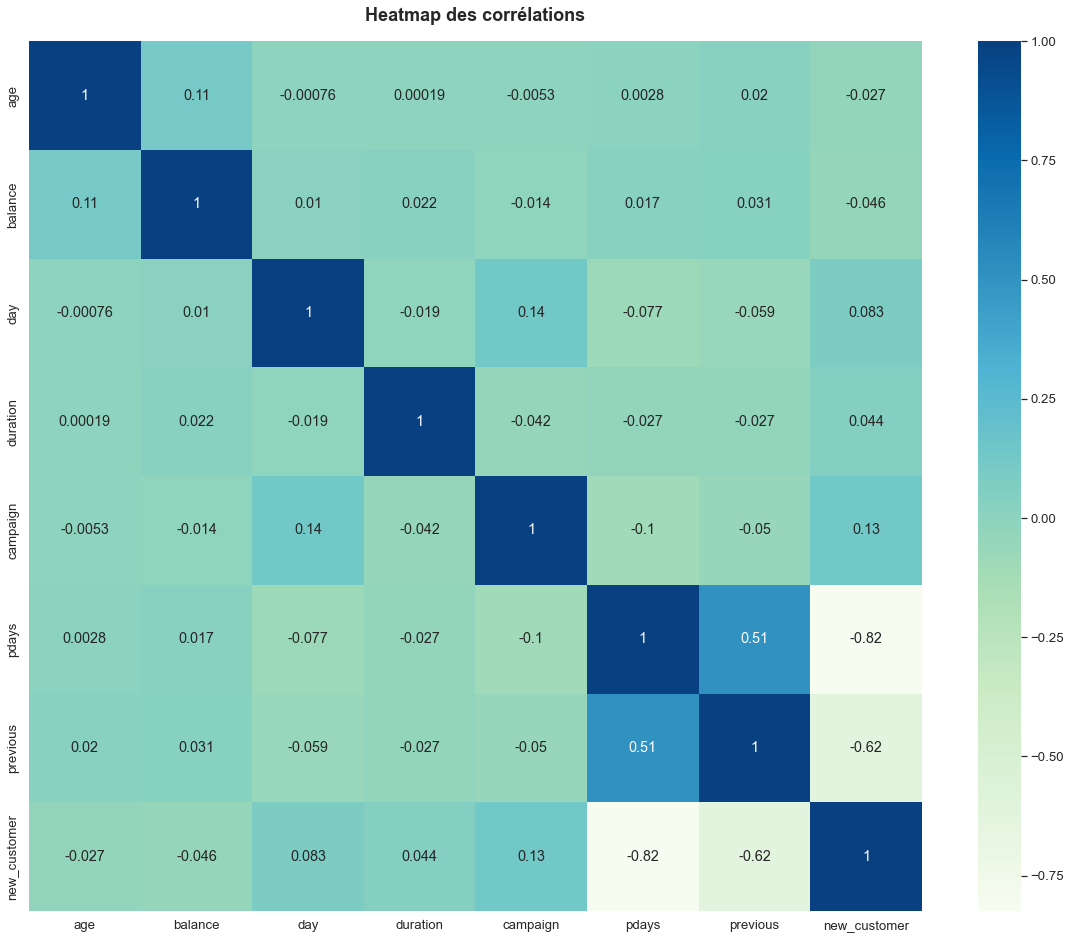

In [13]:
matrix = df.corr(method='pearson')
mask = np.triu(np.ones_like(matrix, dtype=np.bool))

plt.figure(figsize=(20, 16))
sns.heatmap(matrix, annot=True, cmap="GnBu")
plt.title("Heatmap des corrélations")
plt.show()

> Les variables **pdays** et **previous** semblent être corrélées (+0,51).  

Pour rappel :
- pdays : nombre de jours passés aprés la campagne en cours et la dernière campagne
- previous : nombre de contact de la précédente campagne

### Par caractéristiques clients

In [14]:
df_job_deposit = df[["job", "deposit"]]
df_job_deposit_gp = df.groupby(['job'])['deposit'].value_counts(normalize=True).reset_index(name='success')
df_job_deposit_gp = df_job_deposit_gp[(df_job_deposit_gp.deposit == 'yes')]
df_job_deposit_gp = df_job_deposit_gp.sort_values(by=['success'], ascending=False).reset_index()
df_job_deposit_gp

index            job deposit   success
0      16        student     yes  0.747222
1      10        retired     yes  0.663239
2      20     unemployed     yes  0.565826
3       8     management     yes  0.507015
4      23        unknown     yes  0.485714
5       1         admin.     yes  0.473013
6      13  self-employed     yes  0.461728
7      19     technician     yes  0.460779
8      15       services     yes  0.399783
9       7      housemaid     yes  0.397810
10      5   entrepreneur     yes  0.375000
11      3    blue-collar     yes  0.364198

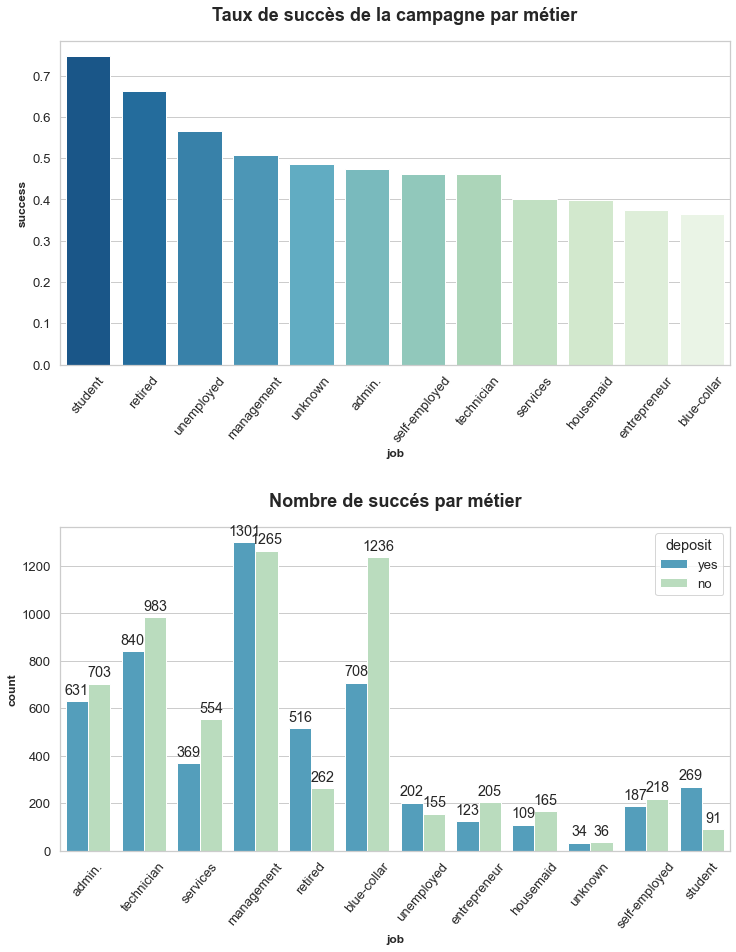

In [15]:
plt.subplot(2,1,1)
ax = sns.barplot(data=df_job_deposit_gp,
            x="job", y="success", palette="GnBu_r")
ax.set_title('Taux de succès de la campagne par métier')
ax.tick_params(axis='x', labelrotation=50)

plt.subplot(2,1,2)
ax = sns.countplot(x= 'job', hue = 'deposit', data=df_job_deposit, palette="GnBu_r")
ax.set_title('Nombre de succés par métier')
ax.tick_params(axis='x', labelrotation=50)
for container in ax.containers:
    ax.bar_label(container, padding = 4)

plt.subplots_adjust(top=2, hspace = 0.5, wspace = 0.4)
plt.show()

> Le taux de conversion est plus important auprès des **étudiants et des retraités**. Les taux les plus bas concernent des métiers plus manuels.  
> Le nombre de souscriptions est le plus élevé chez les managers qui sont les plus représentés dans les clients prospectés. On retrouve ensuite les techniciens et les cols bleus. 

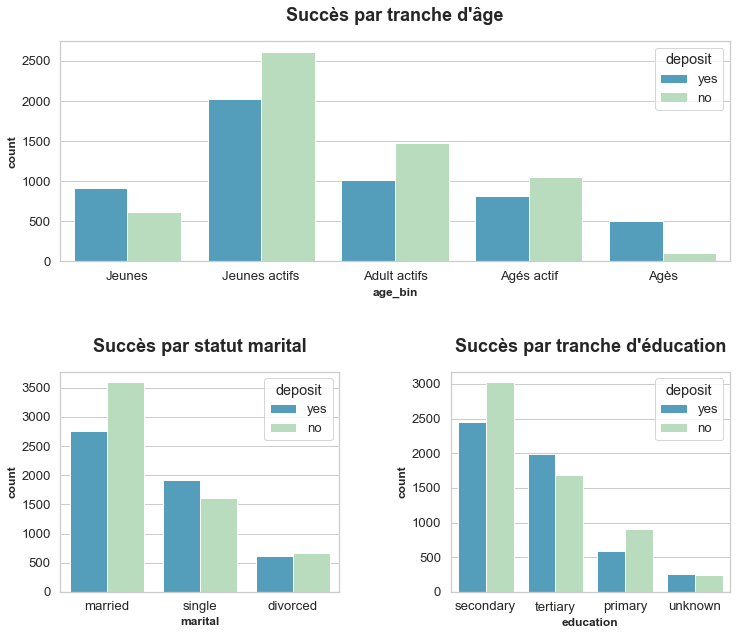

In [16]:
df["age_bin"]=pd.cut(
    df.age,
    bins = [18,29,40,50,60,100],
    labels = ['Jeunes', 'Jeunes actifs', 'Adult actifs', "Agés actif", 'Agès']
)

plt.subplot(2,1,1)
ax = sns.countplot(x="age_bin", data=df, hue="deposit", palette=palette)
ax.set_title("Succès par tranche d'âge")

plt.subplot(2,2,3)
ax = sns.countplot(data=df, x='marital', hue="deposit", palette=palette)
ax.set_title("Succès par statut marital")

plt.subplot(2,2,4)
ax = sns.countplot(data=df, x='education', hue="deposit", palette=palette)
ax.set_title("Succès par tranche d'éducation")


plt.subplots_adjust(top=1.4, hspace = 0.5, wspace = 0.4)
plt.show()

> Le taux de souscription est plus élevé chez les jeunes (moins de 30 ans) et les personnes âgées (plus de 60 ans).  
> Les célibataires ont un taux de souscription plus élevé tandis que les mariés sont moins avenants. Il serait intéressant de comparer les dépenses de ces deux catégories qui peuvent influer sur la prise de décision.  

### Caractéristiques bancaires

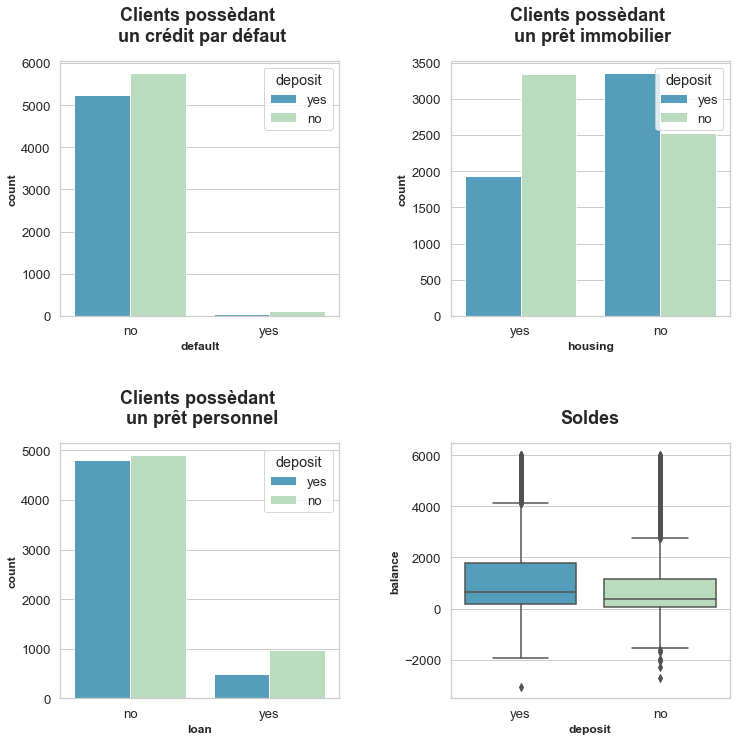

In [17]:
plt.subplot(2,2,1)
ax = sns.countplot(x="default", hue="deposit", data=df, palette=palette)
ax.set_title("Clients possèdant \n un crédit par défaut")

plt.subplot(2,2,2)
ax =  sns.countplot(x="housing", hue="deposit", data=df, palette=palette)
ax.set_title("Clients possèdant \n un prêt immobilier")

plt.subplot(2,2,3)
ax = sns.countplot(x="loan", hue="deposit", data=df, palette=palette)
ax.set_title("Clients possèdant \n un prêt personnel")

plt.subplot(2,2,4)
ax = sns.boxplot(x="deposit", y="balance", data=df_filtered, palette=palette)
ax.set_title("Soldes")

plt.subplots_adjust(top=1.6, hspace = 0.5, wspace = 0.4)
plt.show()

> Le fait de déjà posséder un crédit ne semble pas être un critère décisif.
> Les propriétaires de biens immobiliers souscrivent moins aux  DAT car ils semblent avoir déjà fait leurs choix d'investissement. Les clients qui n'ont pas de crédit immobilier souscrivent plus facilement.    
> Les clients ayant les **soldes bancaires les plus élevés** sont des de meilleurs candidats à la souscription. Ils possèdent effectivement un pouvoir d'investissement plus élevé.

### Paramètres de la campagne

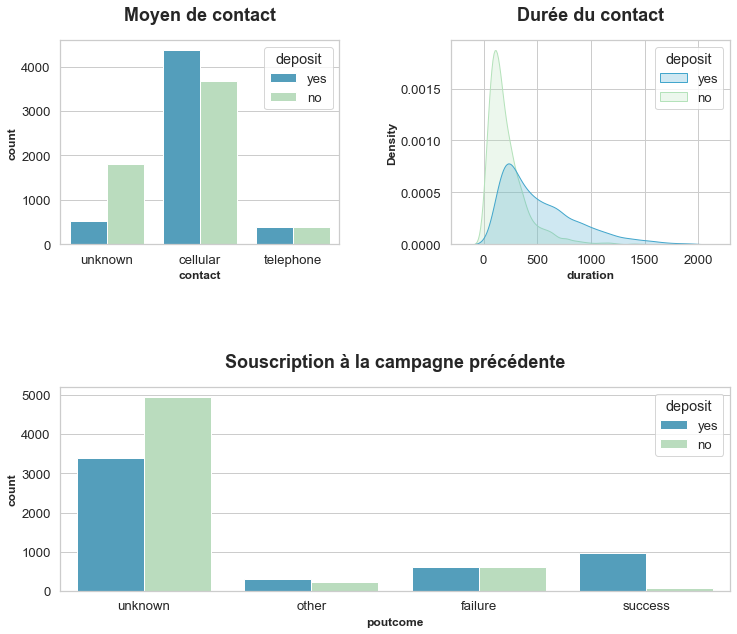

In [18]:
plt.subplot(2,2,1)
ax = sns.countplot(x="contact", hue="deposit", data=df, palette=palette)
ax.set_title("Moyen de contact")

plt.subplot(2,2,2)
ax =  sns.kdeplot(x="duration", hue="deposit", data=df[df["duration"] < 2000], palette=palette, shade=True)
ax.set_title("Durée du contact")

plt.subplot(2,1,2)
ax = sns.countplot(x="poutcome",hue="deposit",data=df, palette=palette)
ax.set_title("Souscription à la campagne précédente")

plt.subplots_adjust(top=1.4, hspace = 0.7, wspace = 0.4)
plt.show()

> Les clients sont contactés principalement sur leur téléphone mobile.  
> Les conversations de plus de **150 secondes** aboutissent plus à une réponse positive.

### Données temporelles

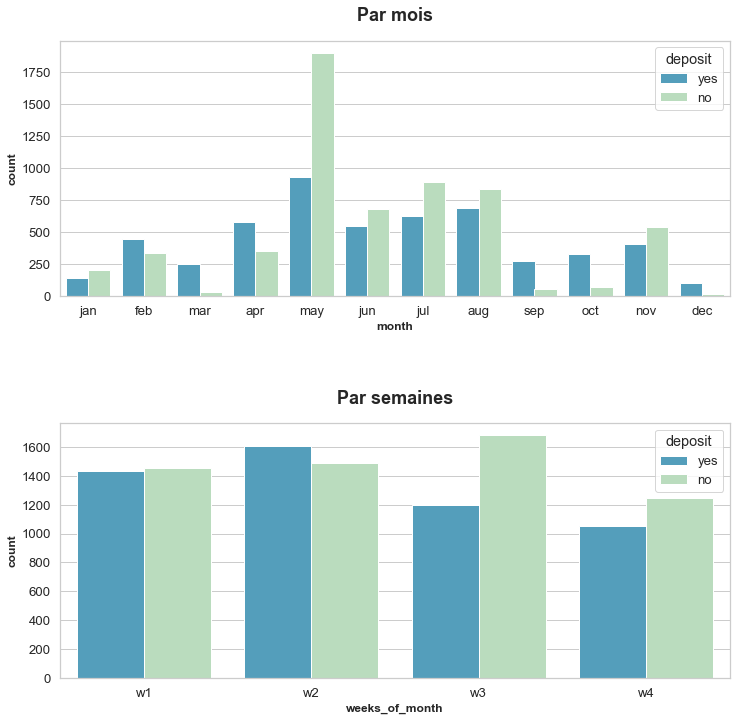

In [19]:
plt.subplot(2,1,1)
ax = sns.countplot(x="month",hue="deposit",data=df,order=(
    "jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"),
                   palette=palette)
ax.set_title("Par mois")

plt.subplot(2,1,2)
df["weeks_of_month"] = pd.cut(df.day, bins=4, labels = ["w1","w2","w3","w4"])
ax = sns.countplot(x="weeks_of_month", hue="deposit", data=df, palette=palette)
ax.set_title("Par semaines")

plt.subplots_adjust(top=1.6, hspace = 0.5)
plt.show()

> Les taux de souscription sont plus élevés pour les mois de **mars, avril, septembre, ocotobre et décembre**.

#### Saisonnalité

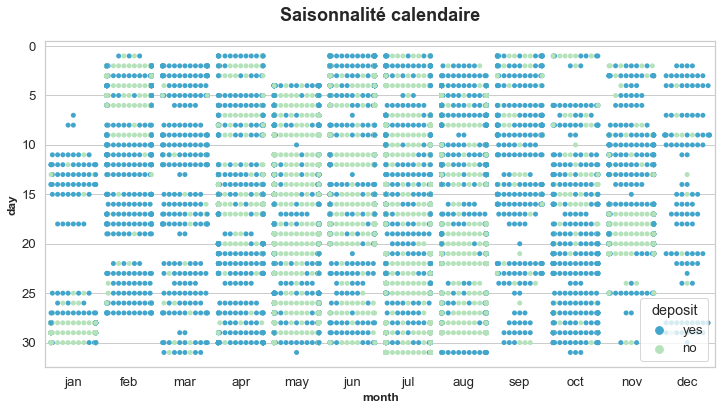

In [20]:
ax = sns.swarmplot(x="month", y="day", hue="deposit", data=df, 
                   order=("jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"),
                   palette=palette)
ax.invert_yaxis()
ax.set_title("Saisonnalité calendaire")
plt.show()

D'un point de vue calendaire, on observe des saisonnalités dans les souscriptions. La période la plus propice à cibler semble s'étendre **de septembre à mars**.

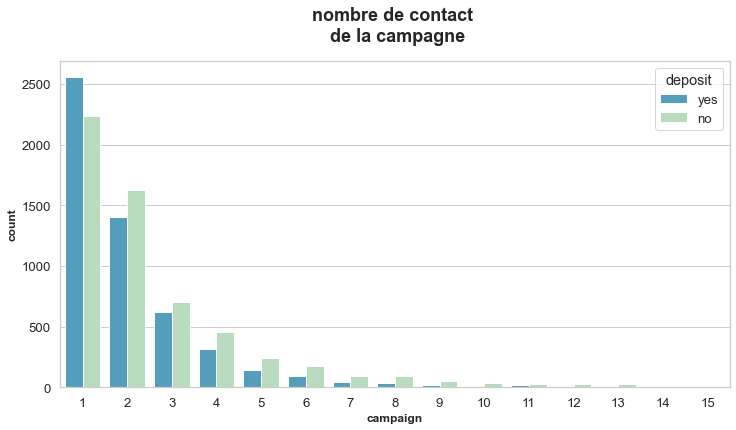

In [21]:
plt.figure(figsize=(12,6))

ax = sns.countplot(x="campaign",hue="deposit", data=df[df["campaign"] < 16], palette=palette)
ax.set_title("nombre de contact \n de la campagne")

plt.show()

> Le taux de souscription est élevé pour le premier contact.

[Retour au sommaire](#Sommaire)

## Recommandations

L'analyse des données a permis de segmenter notre clientèle, définir des personas et déterminer les paramètres les plus optimisés pour la future campagne. Le taux de souscription serait plus élevé car les clients prospectés selon des clients cibles. Voici les recommandations :

**Segmentation clients :**  
- La prospection doit cibler les clients **jeunes** et **relativement âgés** qui recherchent des options d'investissement sûres et rentables.
- Le solde du compte influence sur la prise de décision. Les clients ayant un **solde moyen ou élevé** sont plus susceptibles de souscrire à un DAT.
- Si un client a un prêt à long terme tel qu'un crédit immobilier, il lui sera très difficile de souscrire un dépôt à terme.
- Les clients ayant des emplois 'cols bleus' et 'services' sont moins susceptibles de souscrire au dépôt à terme.

**Paramètres optimisés de la campagne :**
- L'équipe marketing doit essayer d'avoir **des appels plus longs** et argumentés. La corrélation de la variable « durée » avec la variable cible montre que plus la durée est élevée, plus il est probable que le client souscrira aux dépôts à terme.
- Le téléphone portable semble être le mode de communication le plus adapté. Les clients sont effectivement plus facilement joignables.
- Le centre d'appels devrait **limiter le nombre d'appels** à un client à plus de 4 fois, cela peut être dérangeant et intrusif.
- Il serait intéressant de lancer la campagne au début d'un mois.
- La période où les souscriptions sont importantes s'étend de **septembre à mars**.

[Retour au sommaire](#Sommaire)

## Modèle de prédiction

Nous avons pu analyser les caractéristiques des données et segmenter nos clients. Mais comment allons-nous faire pour la prochaine campagne ? Il va être complexe de prioriser les clients à contacter en appliquant tout ce que l'on a vu sur une base de données de plusieurs milliers d'entrées. C'est là qu'intervient la modélisation. Elle va permettre de traiter automatiquement les données en temps réel ou non et créer des motifs de contacts pour les commerciaux.

Pour notre prochaine de télé-marketing, nous allons utiliser un modèle qui va être implémenté dans un programme pour générer une liste de clients à contacter, tout ça grâce à votre Data Analyst préféré.

<center><img src="img/tony-may.gif"/></center>

### Pré traitement

#### Encodage des variables catégoriques

Avant d'effectuer l'échantiollonnage, nous allons encoder les colonnes catégoriques. On leur attribue ainsi un entier unique.

In [22]:
df_temp = data.copy()
df_temp['poutcome'] = df_temp['poutcome'].replace('unknown',np.nan)

In [23]:
df_encoded = df_temp[cat_cols].apply(LabelEncoder().fit_transform)

In [24]:
num_cols= df_temp._get_numeric_data().columns
df_encoded = df_encoded.join(df_temp[num_cols])

On déplace la colonne cible "deposit" en dernière position pour une meilleure lecture :

In [25]:
df_encoded = df_encoded[ [ col for col in df_encoded.columns if col != 'deposit' ] + ['deposit'] ]

In [26]:
df_encoded.head()

job  marital  education  default  housing  loan  contact  month  poutcome  \
0    0        1          1        0        1     0        2      8         3   
1    0        1          1        0        0     0        2      8         3   
2    9        1          1        0        1     0        2      8         3   
3    7        1          1        0        1     0        2      8         3   
4    0        1          2        0        0     0        2      8         3   

   age  balance  day  duration  campaign  pdays  previous  deposit  
0   59     2343    5      1042         1     -1         0        1  
1   56       45    5      1467         1     -1         0        1  
2   41     1270    5      1389         1     -1         0        1  
3   55     2476    5       579         1     -1         0        1  
4   54      184    5       673         2     -1         0        1

#### Centrage et réduction

In [27]:
# split des variables indépendantes
X = df_encoded.iloc[:, :-1]
y = df_encoded.iloc[:, -1]

In [28]:
# standardisation des données
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

### Échantillonnage

Nous allons utiliser la **validation croisée stratifiée** qui va nous permettre d'utiliser l'intégralité des données pour l'entraînement de nos modèles et limiter les effets de biais. Le but est de découper le jeu de données en k parties (folds) et les utiliser chacune leur tour comme jeu de test. On peut évaluer la performance de nos modèles :
- soit en évaluant les prédictions faites sur l’ensemble des données;
- soit en moyennant les performances obtenues sur les k folds, auquel cas je peux aussi rapporter l’erreur type, pour quantifier la variation de ces performances sur les k folds.

In [29]:
skf = StratifiedKFold(n_splits=5, random_state=None)

### Comparatif des modèles de machine learning

#### Les modèles testés

In [30]:
dict_models = {
    "Logistic Regression" : LogisticRegression(multi_class='ovr', solver='liblinear'),
    "Nearest Neighbors"   : KNeighborsClassifier(n_neighbors=2),
    "Linear SVM"          : SVC(),
    "Gradient Boosting"   : GradientBoostingClassifier(),
    "Decision Tree"       : tree.DecisionTreeClassifier(),
    "Random Forest"       : RandomForestClassifier(n_estimators=18),
    "Neural Net"          : MLPClassifier(alpha=1),
    "Naive Bayes"         : GaussianNB(),
    "SGD"                 : SGDClassifier(),
    "XGB"                 : XGBClassifier(n_estimators=100, eval_metric='rmse')
}

#### Evaluations des modèles

In [31]:
scoring = {
    'accuracy'  : make_scorer(accuracy_score), 
    'precision' : make_scorer(precision_score),
    'recall'    : make_scorer(recall_score), 
    'f1_score'  : make_scorer(f1_score),
    'kappa_score': make_scorer(cohen_kappa_score)
}

In [32]:
data = []

for key, model in dict_models.items():
    
    results = cross_validate(
        estimator=model,
        X=X_scaled,
        y=y,
        cv=skf,
        scoring=scoring,
        return_estimator =True)
    
    data.append([
        key,
        results["test_accuracy"].mean(),
        results["test_precision"].mean(),
        results["test_recall"].mean(),
        results["test_f1_score"].mean(),
        results["test_kappa_score"].mean()
    ])
    
df_results = pd.DataFrame(data, columns=['Models', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'Kappa'])
df_results = df_results.sort_values(by='Accuracy', ascending=False)

In [33]:
df_results

Models  Accuracy  Precision    Recall  F1-Score     Kappa
3    Gradient Boosting  0.812225   0.808020  0.790899  0.797976  0.622752
9                  XGB  0.805868   0.814076  0.763489  0.785299  0.608986
5        Random Forest  0.792609   0.804229  0.740798  0.768198  0.581877
6           Neural Net  0.790901   0.785979  0.767828  0.775944  0.580057
2           Linear SVM  0.785977   0.781659  0.759512  0.769304  0.569931
0  Logistic Regression  0.766532   0.780070  0.706761  0.740485  0.529469
8                  SGD  0.761425   0.773940  0.702220  0.735475  0.519275
4        Decision Tree  0.740646   0.751430  0.673675  0.708827  0.476830
7          Naive Bayes  0.723000   0.690119  0.743814  0.714536  0.445913
1    Nearest Neighbors  0.680979   0.785227  0.444521  0.564743  0.345598

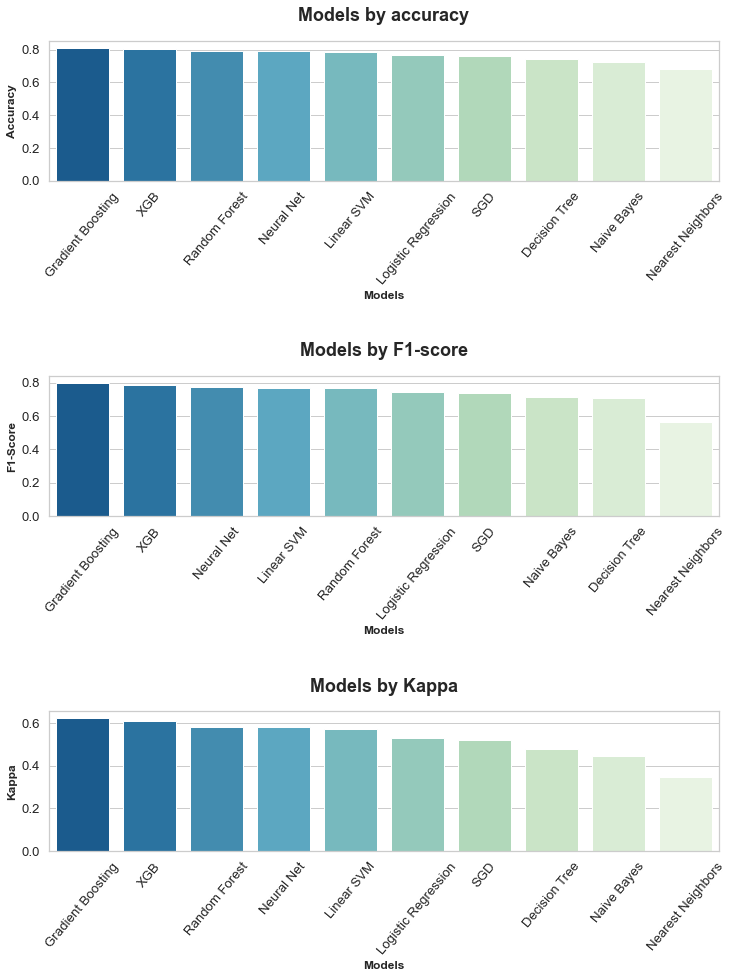

In [34]:
plt.figure(figsize=(12,6))

plt.subplot(3,1,1)
ax = sns.barplot(data = df_results, x="Models", y="Accuracy", palette="GnBu_r")
ax.set_title("Models by accuracy")
ax.tick_params(axis='x', labelrotation=50)

plt.subplot(3,1,2)
ax = sns.barplot(data = df_results.sort_values(by='F1-Score', ascending=False),
                 x="Models", y="F1-Score", palette="GnBu_r")
ax.set_title("Models by F1-score")
ax.tick_params(axis='x', labelrotation=50)

plt.subplot(3,1,3)
ax = sns.barplot(data = df_results.sort_values(by='Kappa', ascending=False), 
                 x="Models", y="Kappa", palette="GnBu_r")
ax.set_title("Models by Kappa")
ax.tick_params(axis='x', labelrotation=50)

plt.subplots_adjust(top=2, hspace = 1.4)
plt.show()

- La précision (Accuracy) permet de mesurer le succès d'un modèle mais elle n'est pas suffisante à elle seule pour choisir notre modèle. 
- La valeur F1 Score, moyenne harmonique des valeurs Precision et Recall est intéressante.  
- Le kappa de Cohen est une statistique utile pour tester la fiabilité (similaire aux coefficients de corrélation, entre -1 et +1). Elle permet d'avoir une estimation du hasard dans nos résultats. Elle représente la correspondance parfaite entre les évaluateurs.  


<div class="alert alert-info"><strong>CHOIX DU MODELE :</strong><br> Grâce à ces indicateurs, on peut choisir un modèle sur lequel nous pouvons baser notre programme de prédiction. On choisit de partir sur le <b>xgboost</b> qui est une implémentation open source optimisée de l’algorithme d’arbres de boosting de gradient. On parle d’ailleurs de méthode d’agrégation de modèles. L’idée est donc simple : au lieu d’utiliser un seul modèle, l’algorithme va en utiliser plusieurs qui serons ensuite combinés pour obtenir un seul résultat.
</div>

[Retour au sommaire](#Sommaire)

### Modélisation

Dans cette partie de modélisation, nous allons définir les meilleurs paramètres pour nos modèles et les variables (ou caractéristiques) qui auront le plus d'impact sur la réussite d'obtenir une réponse positive à la souscription de notre DAT.

Le choix du modèle est fait. Il correspond aux besoins métier. Il reste à l'optimiser en choisissant les hyper-paramètres. En entraînant un modèle avec des données existantes, nous pouvons ajuster les paramètres du modèle (avec RandomizedSearchCV par exemple). Ici toute la démarche n'est pas détaillée. En effet, cela fait déjà un moment que j'ai votre attention.

In [35]:
xgb = XGBClassifier(
    booster = 'gbtree',
    objective = 'binary:logistic',
    n_estimators = 100,
    min_child_weight = 1,
    eval_metric = 'rmse')

xgb_results = cross_val_score(xgb, X_scaled, y, cv=skf)

print("Tuned XGB Accuracy: %.2f%%" % (xgb_results.mean() * 100.0))

Tuned XGB Accuracy: 80.59%


In [36]:
results_xgb = xgb.fit(X_scaled, y)

In [37]:
feature_importance = results_xgb.feature_importances_

feature_importance_values = np.array(feature_importance)
feature_names = np.array(X_scaled.columns)

df_feature = pd.DataFrame({
    'feature_names':feature_names,
    'feature_importance_values':feature_importance_values})
    
df_feature.sort_values(by=['feature_importance_values'], ascending=False,inplace=True)

Text(0, 0.5, 'Feature Names')

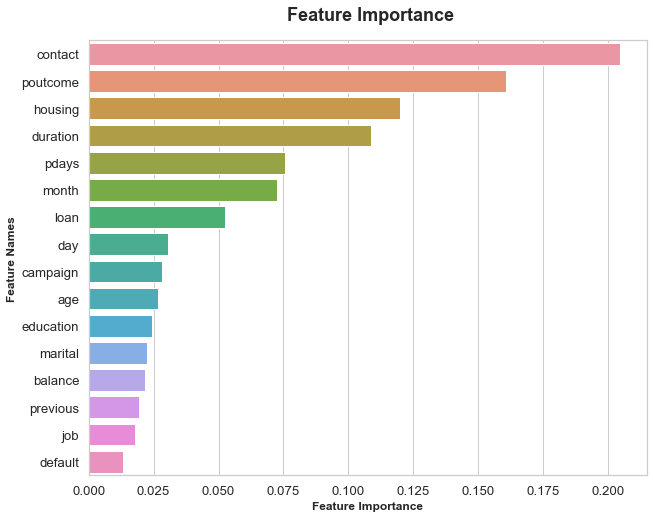

In [38]:
plt.figure(figsize=(10,8))
sns.barplot(x=df_feature['feature_importance_values'], y=df_feature['feature_names'])
plt.title(' Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')

> On retrouve dans notre modèle des caractéristiques que l'on a pu voir dans l'analyse bivariée. On peut observer que la manière dont se déroule l'opération marketing joue un rôle important dans son succès.

[Retour au sommaire](#Sommaire)

## Programme de prédiction

Notre modèle est paramétré. La question de savoir ce que l'on en fait.

Nous allons maintenant l'implémenter dans un programme pour automatiser la prédiction de réussite par client et la génération de la liste des clients à contacter. Cette liste sera transmise par la suite aux commerciaux avec les motifs de contacts associés.

In [41]:
# répertoire du dossier à tester
DATA_TEST_PATH = os.path.realpath('') + '/to_test/'

# imporation des données
df_to_test = pd.read_csv(DATA_TEST_PATH + "CRM_test.csv", delimiter=";", encoding='utf8')

# préparation dews données
df_prep = df_to_test.copy()
df_prep['poutcome'] = df_prep['poutcome'].replace('unknown',np.nan)
df_prep.drop('id_clients', inplace=True, axis=1)

cat_cols = df_prep.select_dtypes(include='object').columns
num_cols= df_prep._get_numeric_data().columns

# encodage
df_encoded = df_prep[cat_cols].apply(LabelEncoder().fit_transform)
df_encoded = df_encoded.join(df_to_test[num_cols])

# centrage et réduction
X = df_encoded.values
names = df_encoded.index
X_scaled = std_scale.transform(X)
df_prep = pd.DataFrame(X_scaled, columns=df_encoded.columns)

# prédiction
y_pred_logic = xgb.predict(df_prep)
df_to_test['prediction'] = y_pred_logic

# probabilité
proba_false = xgb.predict_proba(df_prep)[:, 0]
proba_false = [round(num, 5) for num in proba_false]
df_to_test['probability_is_false'] = proba_false
    
# liste des résultats
df_result = df_to_test[[
    "id_clients",
    "prediction",
    "probability_is_false"]].set_index("id_clients")
df_result.prediction = df_result.prediction.astype(bool)
print(df_result)

            prediction  probability_is_false
id_clients                                  
8422             False               0.95315
9226             False               0.97260
8162             False               0.52659
4337              True               0.06337
2438              True               0.03849
...                ...                   ...
6952             False               0.99966
5441             False               0.99044
4137              True               0.09074
2257              True               0.05939
5559             False               0.81083

[2000 rows x 2 columns]


**Clients à contacter en priorité :**

In [42]:
# sélection des clients à contacter
df_selected = df_result[df_result['prediction'] == True]
df_selected.sort_values(by=['probability_is_false'], ascending=True,inplace=True)
df_selected.iloc[:20]

prediction  probability_is_false
id_clients                                  
3474              True               0.00034
3463              True               0.00055
4148              True               0.00170
3211              True               0.00172
3472              True               0.00201
2858              True               0.00242
3300              True               0.00258
3679              True               0.00299
3891              True               0.00302
5197              True               0.00306
4239              True               0.00348
3807              True               0.00365
2701              True               0.00376
551               True               0.00419
4161              True               0.00425
4146              True               0.00440
5012              True               0.00442
1198              True               0.00445
4003              True               0.00446
3716              True               0.00446

## Conclusion

<center><img src="img/tony_may2.gif"/></center>

[Retour au sommaire](#Sommaire)